In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import skew, kurtosis, mode

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("scipy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)

numpy version: 2.0.2
pandas version: 2.2.3
scipy version: 1.15.2
scikit-learn version: 1.6.1


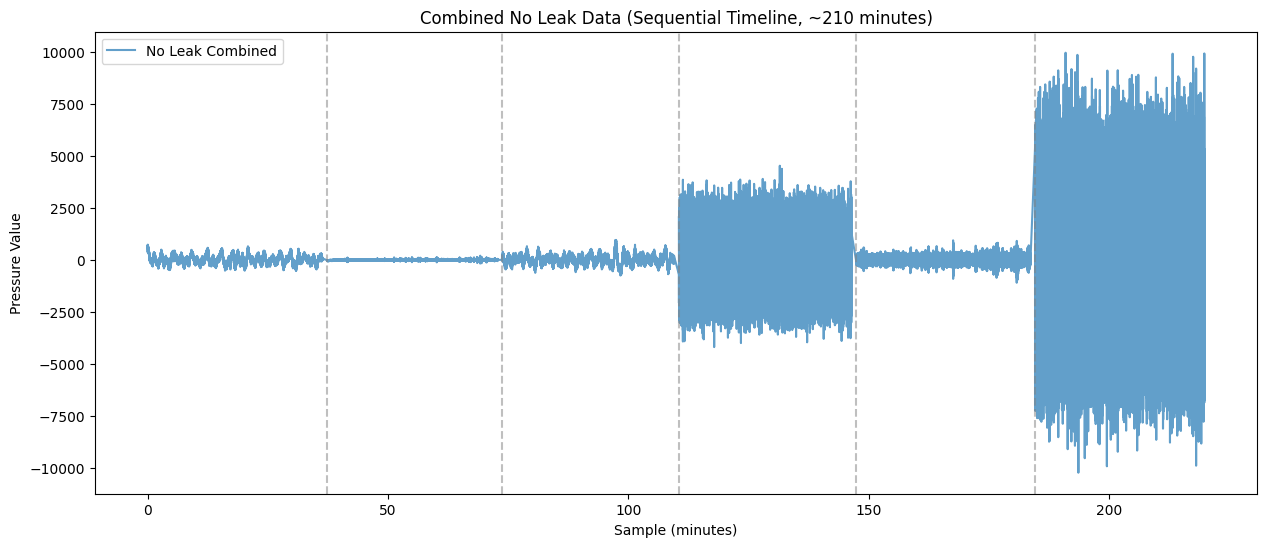

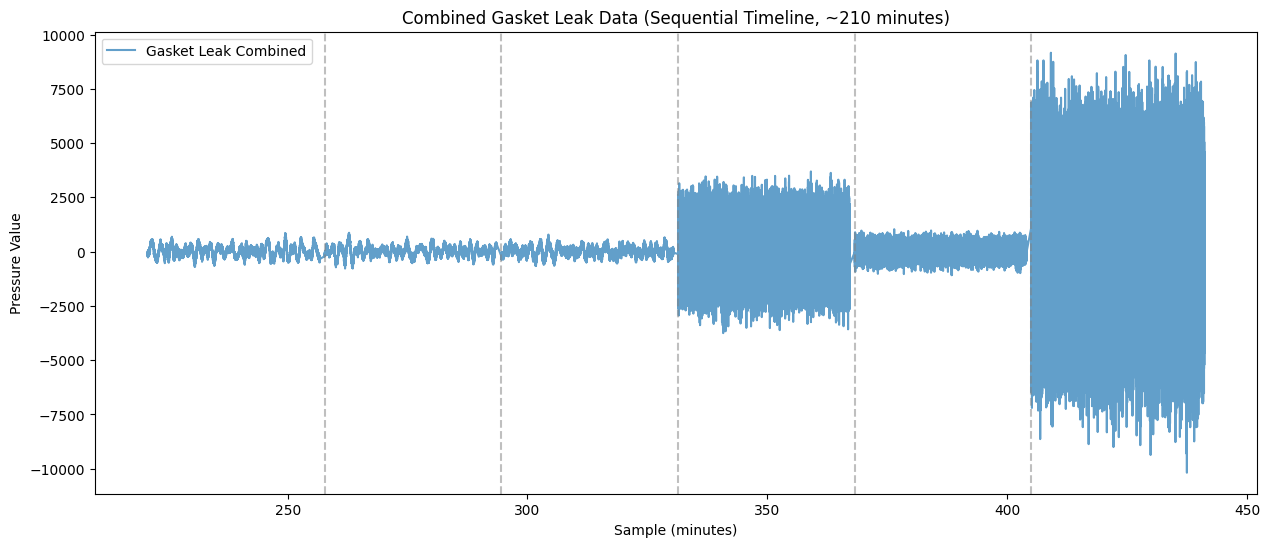

c:\Users\User\anaconda3\envs\Research_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


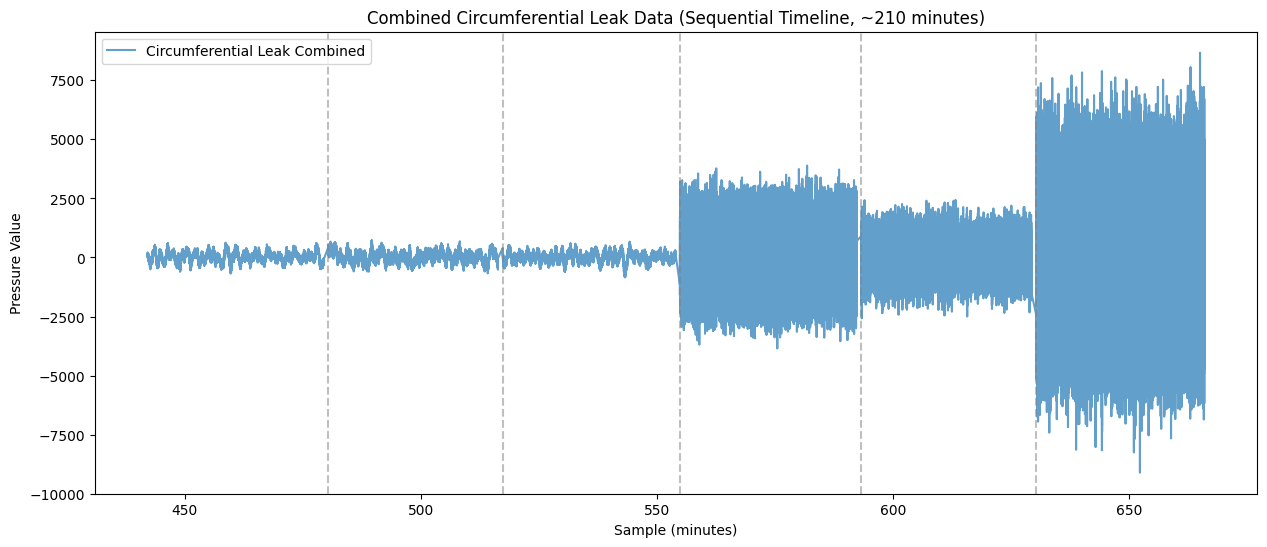

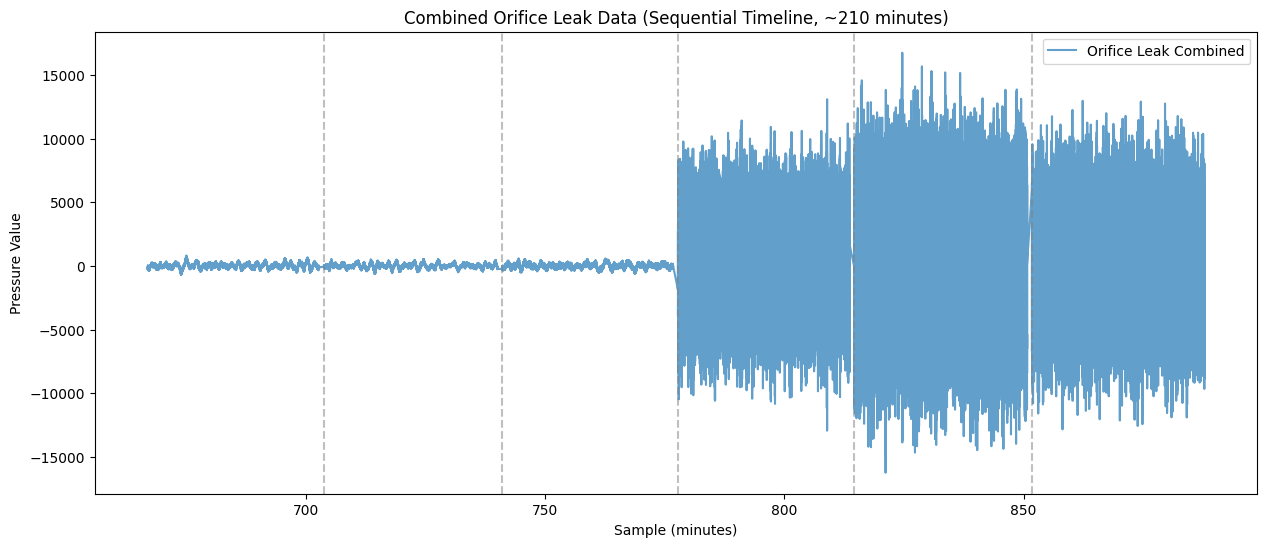

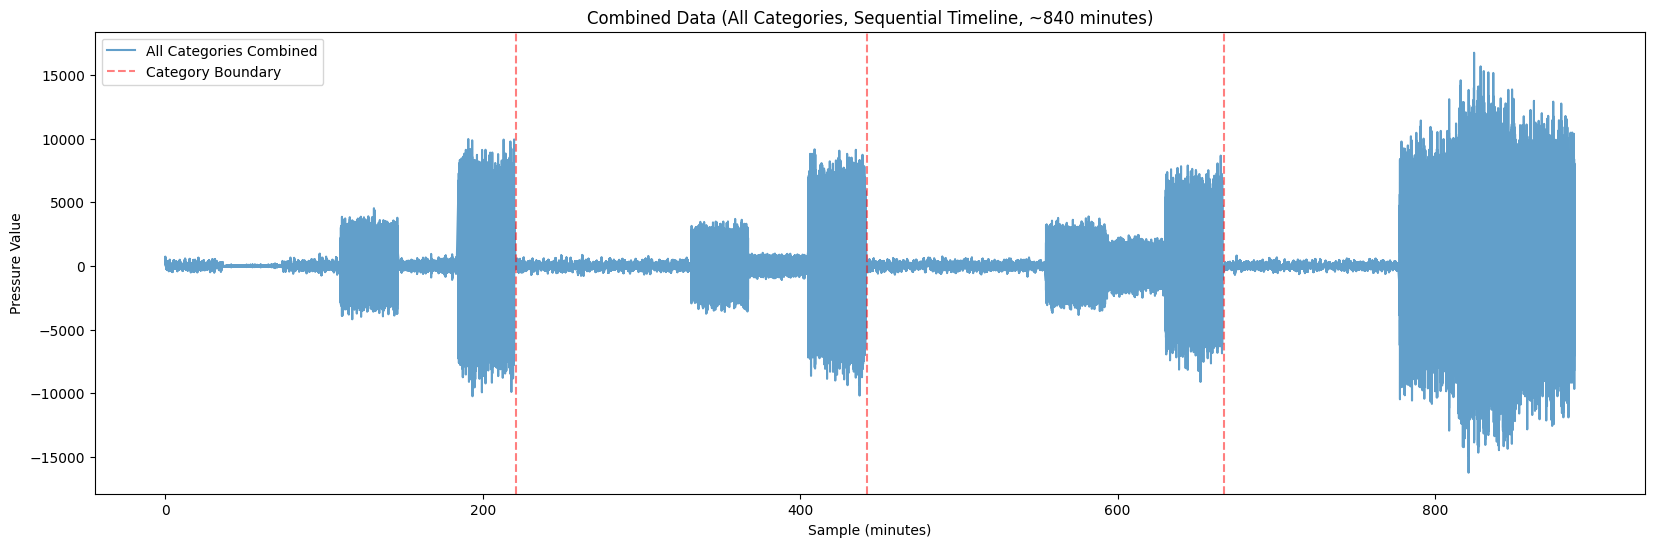

Combined data saved to 'combined_data.csv'


In [2]:
# Shell 1: Load and Combine Datasets (Corrected for Continuous Timeline with Additional Plots)
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets (P2)
data_18_noleak = pd.read_csv('pressure_readings_p2/LO_NL_0.18 LPS_P2.csv')
data_noFlow_noleak = pd.read_csv('pressure_readings_p2/LO_NL_ND_P2.csv')
data_47_noleak = pd.read_csv('pressure_readings_p2/LO_NL_0.47 LPS_P2.csv')

data_18_gasket = pd.read_csv('pressure_readings_p2/LO_GL_0.18 LPS_P2.csv')
data_gasket_noFlow = pd.read_csv('pressure_readings_p2/LO_GL_ND_P2.csv')
data_47_nd_GL = pd.read_csv('pressure_readings_p2/LO_GL_0.47 LPS_P2.csv')

data_18_CC = pd.read_csv('pressure_readings_p2/LO_CC_0.18 LPS_P2.csv')
data_CC_noFlow = pd.read_csv('pressure_readings_p2/LO_CC_ND_P2.csv')
data_47_nd_CC = pd.read_csv('pressure_readings_p2/LO_CC_0.47 LPS_P2.csv')

data_18_OL = pd.read_csv('pressure_readings_p2/LO_OL_0.18 LPS_P2.csv')
data_OL_noFlow = pd.read_csv('pressure_readings_p2/LO_OL_ND_P2.csv')
data_47_nd_OL = pd.read_csv('pressure_readings_p2/LO_OL_0.47 LPS_P2.csv')

# Load the datasets (P1)
data_18_noleak_p1 = pd.read_csv('pressure_readings_p1/LO_NL_0.18 LPS_P1.csv')
data_noFlow_noleak_p1 = pd.read_csv('pressure_readings_p1/LO_NL_ND_P1.csv')
data_47_noleak_p1 = pd.read_csv('pressure_readings_p1/LO_NL_0.47 LPS_P1.csv')

data_18_gasket_p1 = pd.read_csv('pressure_readings_p1/LO_GL_0.18 LPS_P1.csv')
data_gasket_noFlow_p1 = pd.read_csv('pressure_readings_p1/LO_GL_ND_P1.csv')
data_47_nd_GL_p1 = pd.read_csv('pressure_readings_p1/LO_GL_0.47 LPS_P1.csv')

data_18_CC_p1 = pd.read_csv('pressure_readings_p1/LO_CC_0.18 LPS_P1.csv')
data_CC_noFlow_p1 = pd.read_csv('pressure_readings_p1/LO_CC_ND_P1.csv')
data_47_nd_CC_p1 = pd.read_csv('pressure_readings_p1/LO_CC_0.47 LPS_P1.csv')

data_18_OL_p1 = pd.read_csv('pressure_readings_p1/LO_OL_0.18 LPS_P1.csv')
data_OL_noFlow_p1 = pd.read_csv('pressure_readings_p1/LO_OL_ND_P1.csv')
data_47_nd_OL_p1 = pd.read_csv('pressure_readings_p1/LO_OL_0.47 LPS_P1.csv')

# Check column consistency
expected_columns = ['Sample', 'Value']
datasets = [
    data_18_noleak, data_noFlow_noleak, data_47_noleak, data_18_noleak_p1, data_noFlow_noleak_p1, data_47_noleak_p1,
    data_18_gasket, data_gasket_noFlow, data_47_nd_GL, data_18_gasket_p1, data_gasket_noFlow_p1, data_47_nd_GL_p1,
    data_18_CC, data_CC_noFlow, data_47_nd_CC, data_18_CC_p1, data_CC_noFlow_p1, data_47_nd_CC_p1,
    data_18_OL, data_OL_noFlow, data_47_nd_OL, data_18_OL_p1, data_OL_noFlow_p1, data_47_nd_OL_p1
]
for i, df in enumerate(datasets):
    if not all(col in df.columns for col in expected_columns):
        raise ValueError(f"Dataset {i} missing expected columns: {expected_columns}")

# Combine No Leak data with sequential timeline
no_leak_datasets = [
    (data_18_noleak, 'P2_0.18'),
    (data_noFlow_noleak, 'P2_ND'),
    (data_47_noleak, 'P2_0.47'),
    (data_18_noleak_p1, 'P1_0.18'),
    (data_noFlow_noleak_p1, 'P1_ND'),
    (data_47_noleak_p1, 'P1_0.47')
]

base_offset = 0
adjusted_datasets = []
for df, source in no_leak_datasets:
    df_adjusted = df.copy()
    df_adjusted['Sample'] = df_adjusted['Sample'] + base_offset
    df_adjusted['Source'] = source
    adjusted_datasets.append(df_adjusted)
    base_offset = df_adjusted['Sample'].max() + 1  # Offset by the maximum Sample value

no_leak_data = pd.concat(adjusted_datasets)
no_leak_data['Category'] = 'No Leak'

# Combine Gasket Leak data
gasket_leak_datasets = [
    (data_18_gasket, 'P2_0.18'),
    (data_gasket_noFlow, 'P2_ND'),
    (data_47_nd_GL, 'P2_0.47'),
    (data_18_gasket_p1, 'P1_0.18'),
    (data_gasket_noFlow_p1, 'P1_ND'),
    (data_47_nd_GL_p1, 'P1_0.47')
]

adjusted_datasets = []
for df, source in gasket_leak_datasets:
    df_adjusted = df.copy()
    df_adjusted['Sample'] = df_adjusted['Sample'] + base_offset
    df_adjusted['Source'] = source
    adjusted_datasets.append(df_adjusted)
    base_offset = df_adjusted['Sample'].max() + 1

gasket_leak_data = pd.concat(adjusted_datasets)
gasket_leak_data['Category'] = 'gasket leak'

# Combine Circumferential Leak data
CC_leak_datasets = [
    (data_18_CC, 'P2_0.18'),
    (data_CC_noFlow, 'P2_ND'),
    (data_47_nd_CC, 'P2_0.47'),
    (data_18_CC_p1, 'P1_0.18'),
    (data_CC_noFlow_p1, 'P1_ND'),
    (data_47_nd_CC_p1, 'P1_0.47')
]

adjusted_datasets = []
for df, source in CC_leak_datasets:
    df_adjusted = df.copy()
    df_adjusted['Sample'] = df_adjusted['Sample'] + base_offset
    df_adjusted['Source'] = source
    adjusted_datasets.append(df_adjusted)
    base_offset = df_adjusted['Sample'].max() + 1

CC_leak_data = pd.concat(adjusted_datasets)
CC_leak_data['Category'] = 'circumferential leak'

# Combine Orifice Leak data
LC_leak_datasets = [
    (data_18_OL, 'P2_0.18'),
    (data_OL_noFlow, 'P2_ND'),
    (data_47_nd_OL, 'P2_0.47'),
    (data_18_OL_p1, 'P1_0.18'),
    (data_OL_noFlow_p1, 'P1_ND'),
    (data_47_nd_OL_p1, 'P1_0.47')
]

adjusted_datasets = []
for df, source in LC_leak_datasets:
    df_adjusted = df.copy()
    df_adjusted['Sample'] = df_adjusted['Sample'] + base_offset
    df_adjusted['Source'] = source
    adjusted_datasets.append(df_adjusted)
    base_offset = df_adjusted['Sample'].max() + 1

LC_leak_data = pd.concat(adjusted_datasets)
LC_leak_data['Category'] = 'orifice leak'

# # Plot individual dataset (data_18_noleak)
# plt.figure(figsize=(12, 5))
# plt.plot(data_18_noleak['Sample'], data_18_noleak['Value'], label="No Leak 0.18 LPS (P2)", alpha=0.7)
# plt.xlabel("Sample (minutes)")
# plt.ylabel("Pressure Value")
# plt.title("No Leak 0.18 LPS (P2)")
# plt.legend()
# plt.show()

# Plot combined no_leak_data
plt.figure(figsize=(15, 6))
plt.plot(no_leak_data['Sample'], no_leak_data['Value'], label="No Leak Combined", alpha=0.7)
# Add vertical lines to mark dataset boundaries
boundaries = [0]
for df, _ in no_leak_datasets:
    boundaries.append(df['Sample'].max() + boundaries[-1] + 1)
for boundary in boundaries[1:-1]:
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Sample (minutes)")
plt.ylabel("Pressure Value")
plt.title("Combined No Leak Data (Sequential Timeline, ~210 minutes)")
plt.legend()
plt.show()

# Plot combined gasket_leak_data
plt.figure(figsize=(15, 6))
plt.plot(gasket_leak_data['Sample'], gasket_leak_data['Value'], label="Gasket Leak Combined", alpha=0.7)
# Add vertical lines to mark dataset boundaries
boundaries = [gasket_leak_data['Sample'].min()]
for df, _ in gasket_leak_datasets:
    boundaries.append(df['Sample'].max() + boundaries[-1] + 1)
for boundary in boundaries[1:-1]:
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Sample (minutes)")
plt.ylabel("Pressure Value")
plt.title("Combined Gasket Leak Data (Sequential Timeline, ~210 minutes)")
plt.legend()
plt.show()

# Plot combined CC_leak_data
plt.figure(figsize=(15, 6))
plt.plot(CC_leak_data['Sample'], CC_leak_data['Value'], label="Circumferential Leak Combined", alpha=0.7)
# Add vertical lines to mark dataset boundaries
boundaries = [CC_leak_data['Sample'].min()]
for df, _ in CC_leak_datasets:
    boundaries.append(df['Sample'].max() + boundaries[-1] + 1)
for boundary in boundaries[1:-1]:
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Sample (minutes)")
plt.ylabel("Pressure Value")
plt.title("Combined Circumferential Leak Data (Sequential Timeline, ~210 minutes)")
plt.legend()
plt.show()

# Plot combined LC_leak_data
plt.figure(figsize=(15, 6))
plt.plot(LC_leak_data['Sample'], LC_leak_data['Value'], label="Orifice Leak Combined", alpha=0.7)
# Add vertical lines to mark dataset boundaries
boundaries = [LC_leak_data['Sample'].min()]
for df, _ in LC_leak_datasets:
    boundaries.append(df['Sample'].max() + boundaries[-1] + 1)
for boundary in boundaries[1:-1]:
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Sample (minutes)")
plt.ylabel("Pressure Value")
plt.title("Combined Orifice Leak Data (Sequential Timeline, ~210 minutes)")
plt.legend()
plt.show()

# Combine all data
combined_data = pd.concat([no_leak_data, gasket_leak_data, CC_leak_data, LC_leak_data]).reset_index(drop=True)

# Plot combined_data
plt.figure(figsize=(20, 6))
plt.plot(combined_data['Sample'], combined_data['Value'], label="All Categories Combined", alpha=0.7)
# Add vertical lines to mark category boundaries
category_boundaries = [
    no_leak_data['Sample'].max() + 1,
    gasket_leak_data['Sample'].max() + 1,
    CC_leak_data['Sample'].max() + 1
]
for boundary in category_boundaries:
    plt.axvline(x=boundary, color='red', linestyle='--', alpha=0.5, label='Category Boundary' if boundary == category_boundaries[0] else "")
plt.xlabel("Sample (minutes)")
plt.ylabel("Pressure Value")
plt.title("Combined Data (All Categories, Sequential Timeline, ~840 minutes)")
plt.legend()
plt.show()

# Save combined data for use in the next shell
combined_data.to_csv('combined_data.csv', index=False)
print("Combined data saved to 'combined_data.csv'")

In [3]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 22138468


In [4]:
# Shell 2: Add System Setup-Related Features (Adjusted for Sequential Timeline)
import pandas as pd

# Load combined data from Shell 1
combined_data = pd.read_csv('combined_data.csv')

# Function to assign system features
def assign_system_features(df, topology, load, sensor):
    df['Topology'] = topology
    df['Water_Load'] = load
    df['Sensor'] = sensor
    return df

# Define lengths based on Shell 1 datasets
lengths = {
    'data_18_noleak': pd.read_csv('pressure_readings_p2/LO_NL_0.18 LPS_P2.csv')['Sample'].max() + 1,
    'data_noFlow_noleak': pd.read_csv('pressure_readings_p2/LO_NL_ND_P2.csv')['Sample'].max() + 1,
    'data_47_noleak': pd.read_csv('pressure_readings_p2/LO_NL_0.47 LPS_P2.csv')['Sample'].max() + 1,
    'data_18_noleak_p1': pd.read_csv('pressure_readings_p1/LO_NL_0.18 LPS_P1.csv')['Sample'].max() + 1,
    'data_noFlow_noleak_p1': pd.read_csv('pressure_readings_p1/LO_NL_ND_P1.csv')['Sample'].max() + 1,
    'data_47_noleak_p1': pd.read_csv('pressure_readings_p1/LO_NL_0.47 LPS_P1.csv')['Sample'].max() + 1,
    'data_18_gasket': pd.read_csv('pressure_readings_p2/LO_GL_0.18 LPS_P2.csv')['Sample'].max() + 1,
    'data_gasket_noFlow': pd.read_csv('pressure_readings_p2/LO_GL_ND_P2.csv')['Sample'].max() + 1,
    'data_47_nd_GL': pd.read_csv('pressure_readings_p2/LO_GL_0.47 LPS_P2.csv')['Sample'].max() + 1,
    'data_18_gasket_p1': pd.read_csv('pressure_readings_p1/LO_GL_0.18 LPS_P1.csv')['Sample'].max() + 1,
    'data_gasket_noFlow_p1': pd.read_csv('pressure_readings_p1/LO_GL_ND_P1.csv')['Sample'].max() + 1,
    'data_47_nd_GL_p1': pd.read_csv('pressure_readings_p1/LO_GL_0.47 LPS_P1.csv')['Sample'].max() + 1,
    'data_18_CC': pd.read_csv('pressure_readings_p2/LO_CC_0.18 LPS_P2.csv')['Sample'].max() + 1,
    'data_CC_noFlow': pd.read_csv('pressure_readings_p2/LO_CC_ND_P2.csv')['Sample'].max() + 1,
    'data_47_nd_CC': pd.read_csv('pressure_readings_p2/LO_CC_0.47 LPS_P2.csv')['Sample'].max() + 1,
    'data_18_CC_p1': pd.read_csv('pressure_readings_p1/LO_CC_0.18 LPS_P1.csv')['Sample'].max() + 1,
    'data_CC_noFlow_p1': pd.read_csv('pressure_readings_p1/LO_CC_ND_P1.csv')['Sample'].max() + 1,
    'data_47_nd_CC_p1': pd.read_csv('pressure_readings_p1/LO_CC_0.47 LPS_P1.csv')['Sample'].max() + 1,
    'data_18_OL': pd.read_csv('pressure_readings_p2/LO_OL_0.18 LPS_P2.csv')['Sample'].max() + 1,
    'data_OL_noFlow': pd.read_csv('pressure_readings_p2/LO_OL_ND_P2.csv')['Sample'].max() + 1,
    'data_47_nd_OL': pd.read_csv('pressure_readings_p2/LO_OL_0.47 LPS_P2.csv')['Sample'].max() + 1,
    'data_18_OL_p1': pd.read_csv('pressure_readings_p1/LO_OL_0.18 LPS_P1.csv')['Sample'].max() + 1,
    'data_OL_noFlow_p1': pd.read_csv('pressure_readings_p1/LO_OL_ND_P1.csv')['Sample'].max() + 1,
    'data_47_nd_OL_p1': pd.read_csv('pressure_readings_p1/LO_OL_0.47 LPS_P1.csv')['Sample'].max() + 1
}

# Define subsets with cumulative indexing based on Sample values
start = 0
data_18_noleak = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_noleak'])]
start += lengths['data_18_noleak']
data_noFlow_noleak = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_noFlow_noleak'])]
start += lengths['data_noFlow_noleak']
data_47_noleak = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_noleak'])]
start += lengths['data_47_noleak']
data_18_noleak_p1 = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_noleak_p1'])]
start += lengths['data_18_noleak_p1']
data_noFlow_noleak_p1 = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_noFlow_noleak_p1'])]
start += lengths['data_noFlow_noleak_p1']
data_47_noleak_p1 = combined_data[(combined_data['Category'] == 'No Leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_noleak_p1'])]
start += lengths['data_47_noleak_p1']

data_18_gasket = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_gasket'])]
start += lengths['data_18_gasket']
data_gasket_noFlow = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_gasket_noFlow'])]
start += lengths['data_gasket_noFlow']
data_47_nd_GL = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_GL'])]
start += lengths['data_47_nd_GL']
data_18_gasket_p1 = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_gasket_p1'])]
start += lengths['data_18_gasket_p1']
data_gasket_noFlow_p1 = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_gasket_noFlow_p1'])]
start += lengths['data_gasket_noFlow_p1']
data_47_nd_GL_p1 = combined_data[(combined_data['Category'] == 'gasket leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_GL_p1'])]
start += lengths['data_47_nd_GL_p1']

data_18_CC = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_CC'])]
start += lengths['data_18_CC']
data_CC_noFlow = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_CC_noFlow'])]
start += lengths['data_CC_noFlow']
data_47_nd_CC = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_CC'])]
start += lengths['data_47_nd_CC']
data_18_CC_p1 = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_CC_p1'])]
start += lengths['data_18_CC_p1']
data_CC_noFlow_p1 = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_CC_noFlow_p1'])]
start += lengths['data_CC_noFlow_p1']
data_47_nd_CC_p1 = combined_data[(combined_data['Category'] == 'circumferential leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_CC_p1'])]
start += lengths['data_47_nd_CC_p1']

data_18_OL = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_OL'])]
start += lengths['data_18_OL']
data_OL_noFlow = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_OL_noFlow'])]
start += lengths['data_OL_noFlow']
data_47_nd_OL = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_OL'])]
start += lengths['data_47_nd_OL']
data_18_OL_p1 = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_18_OL_p1'])]
start += lengths['data_18_OL_p1']
data_OL_noFlow_p1 = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_OL_noFlow_p1'])]
start += lengths['data_OL_noFlow_p1']
data_47_nd_OL_p1 = combined_data[(combined_data['Category'] == 'orifice leak') & (combined_data['Sample'] >= start) & (combined_data['Sample'] < start + lengths['data_47_nd_OL_p1'])]

# Assign system features for P2 and P1 datasets
data_18_noleak = assign_system_features(data_18_noleak, 'LO', '0.18', 'P2')
data_noFlow_noleak = assign_system_features(data_noFlow_noleak, 'LO', '0', 'P2')
data_47_noleak = assign_system_features(data_47_noleak, 'LO', '0.47', 'P2')
data_18_noleak_p1 = assign_system_features(data_18_noleak_p1, 'LO', '0.18', 'P1')
data_noFlow_noleak_p1 = assign_system_features(data_noFlow_noleak_p1, 'LO', '0', 'P1')
data_47_noleak_p1 = assign_system_features(data_47_noleak_p1, 'LO', '0.47', 'P1')

data_18_gasket = assign_system_features(data_18_gasket, 'LO', '0.18', 'P2')
data_gasket_noFlow = assign_system_features(data_gasket_noFlow, 'LO', '0', 'P2')
data_47_nd_GL = assign_system_features(data_47_nd_GL, 'LO', '0.47', 'P2')
data_18_gasket_p1 = assign_system_features(data_18_gasket_p1, 'LO', '0.18', 'P1')
data_gasket_noFlow_p1 = assign_system_features(data_gasket_noFlow_p1, 'LO', '0', 'P1')
data_47_nd_GL_p1 = assign_system_features(data_47_nd_GL_p1, 'LO', '0.47', 'P1')

data_18_CC = assign_system_features(data_18_CC, 'LO', '0.18', 'P2')
data_CC_noFlow = assign_system_features(data_CC_noFlow, 'LO', '0', 'P2')
data_47_nd_CC = assign_system_features(data_47_nd_CC, 'LO', '0.47', 'P2')
data_18_CC_p1 = assign_system_features(data_18_CC_p1, 'LO', '0.18', 'P1')
data_CC_noFlow_p1 = assign_system_features(data_CC_noFlow_p1, 'LO', '0', 'P1')
data_47_nd_CC_p1 = assign_system_features(data_47_nd_CC_p1, 'LO', '0.47', 'P1')

data_18_OL = assign_system_features(data_18_OL, 'LO', '0.18', 'P2')
data_OL_noFlow = assign_system_features(data_OL_noFlow, 'LO', '0', 'P2')
data_47_nd_OL = assign_system_features(data_47_nd_OL, 'LO', '0.47', 'P2')
data_18_OL_p1 = assign_system_features(data_18_OL_p1, 'LO', '0.18', 'P1')
data_OL_noFlow_p1 = assign_system_features(data_OL_noFlow_p1, 'LO', '0', 'P1')
data_47_nd_OL_p1 = assign_system_features(data_47_nd_OL_p1, 'LO', '0.47', 'P1')

# Re-combine with system features
combined_data_with_features = pd.concat([
    data_18_noleak, data_noFlow_noleak, data_47_noleak,
    data_18_noleak_p1, data_noFlow_noleak_p1, data_47_noleak_p1,
    data_18_gasket, data_gasket_noFlow, data_47_nd_GL,
    data_18_gasket_p1, data_gasket_noFlow_p1, data_47_nd_GL_p1,
    data_18_CC, data_CC_noFlow, data_47_nd_CC,
    data_18_CC_p1, data_CC_noFlow_p1, data_47_nd_CC_p1,
    data_18_OL, data_OL_noFlow, data_47_nd_OL,
    data_18_OL_p1, data_OL_noFlow_p1, data_47_nd_OL_p1
]).reset_index(drop=True)

# Save the updated data
combined_data_with_features.to_csv('combined_data_with_features.csv', index=False)
print("Combined data with system features saved to 'combined_data_with_features.csv'")

C:\Users\User\AppData\Local\Temp\ipykernel_16608\1522758065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topology'] = topology
C:\Users\User\AppData\Local\Temp\ipykernel_16608\1522758065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Water_Load'] = load
C:\Users\User\AppData\Local\Temp\ipykernel_16608\1522758065.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Combined data with system features saved to 'combined_data_with_features.csv'


In [5]:
# Shell 3: Windowing and Feature Extraction (Memory-Efficient with 0.5-Second Windows)
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load data with system features from Shell 2
combined_data = pd.read_csv('combined_data_with_features.csv')

# Debug: Check the sampling rate
sample_diff = combined_data['Sample'].diff().dropna().mean()
sampling_rate = 1 / sample_diff  # Samples per second
window_duration_seconds = 0.004  # Desired window duration in seconds
window_size = int(window_duration_seconds * sampling_rate)  # Number of rows per 0.5-second window
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Time difference between samples: {sample_diff:.6f} seconds")
print(f"Window size for 0.004 seconds: {window_size} rows")

# Windowing function
def extract_windows(df, window_size):
    windows = [df.iloc[i:i + window_size] for i in range(0, len(df) - window_size + 1, window_size)]
    return windows

# Feature extraction function
def extract_features_per_window(window):
    features = {}
    values = window['Value'].values

    # Time-Domain Features
    features['Mean'] = np.mean(values)
    features['Std'] = np.std(values)
    features['Min'] = np.min(values)
    features['Max'] = np.max(values)
    features['Skewness'] = skew(values)
    features['Kurtosis'] = kurtosis(values)
    features['PeakToPeak'] = np.ptp(values)
    features['Median'] = np.median(values)
    features['Mode'] = pd.Series(values).mode()[0] if not pd.Series(values).mode().empty else np.nan
    features['FirstQuartile'] = np.percentile(values, 25)
    features['ThirdQuartile'] = np.percentile(values, 75)
    features['RootMeanSquare'] = np.sqrt(np.mean(values ** 2))
    features['RootSumSquares'] = np.sqrt(np.sum(values ** 2))
    features['PeakToRMS'] = features['PeakToPeak'] / features['RootMeanSquare'] if features['RootMeanSquare'] != 0 else np.nan
    features['Variance'] = np.var(values)
    features['PeakPosition'] = np.argmax(values)

    # Frequency-Domain Features
    fft_values = np.abs(np.fft.fft(values))
    freqs = np.fft.fftfreq(len(values))
    features['FFT_Mean'] = np.mean(fft_values)
    features['FFT_Std'] = np.std(fft_values)
    features['FFT_Min'] = np.min(fft_values)
    features['FFT_Max'] = np.max(fft_values)
    features['FFT_Skewness'] = skew(fft_values)
    features['FFT_Kurtosis'] = kurtosis(fft_values)
    features['FFT_PeakToPeak'] = np.ptp(fft_values)
    features['FFT_Median'] = np.median(fft_values)
    features['FFT_Mode'] = pd.Series(fft_values).mode()[0] if not pd.Series(fft_values).mode().empty else np.nan
    features['FFT_PeakPosition'] = np.argmax(fft_values)
    features['MeanFrequency'] = np.mean(freqs)

    # System Setup-Related Features
    features['Topology'] = window['Topology'].iloc[0]
    features['Sensor'] = window['Sensor'].iloc[0]
    features['Category'] = window['Category'].iloc[0]

    return pd.Series(features)

# Process data in chunks to avoid MemoryError
chunk_size = 10000  # Number of windows to process at a time (adjust based on your RAM)
windows = extract_windows(combined_data, window_size)
total_windows = len(windows)

# Write features incrementally to CSV
first_chunk = True
for i in range(0, total_windows, chunk_size):
    chunk_windows = windows[i:i + chunk_size]
    chunk_features = pd.DataFrame([extract_features_per_window(window) for window in chunk_windows])
    chunk_features = chunk_features.dropna()  # Drop NaN rows within the chunk
    
    # Write to CSV: append mode for subsequent chunks, header only for first chunk
    if first_chunk:
        chunk_features.to_csv('features_extracted.csv', mode='w', index=False)
        first_chunk = False
    else:
        chunk_features.to_csv('features_extracted.csv', mode='a', header=False, index=False)
    
    print(f"Processed windows {i} to {min(i + chunk_size, total_windows)} of {total_windows}")

print("Features extracted and saved to 'features_extracted.csv'")

Sampling rate: 24936.80 Hz
Time difference between samples: 0.000040 seconds
Window size for 0.004 seconds: 99 rows
Processed windows 0 to 10000 of 223620
Processed windows 10000 to 20000 of 223620
Processed windows 20000 to 30000 of 223620
Processed windows 30000 to 40000 of 223620
Processed windows 40000 to 50000 of 223620
Processed windows 50000 to 60000 of 223620
Processed windows 60000 to 70000 of 223620
Processed windows 70000 to 80000 of 223620
Processed windows 80000 to 90000 of 223620
Processed windows 90000 to 100000 of 223620
Processed windows 100000 to 110000 of 223620
Processed windows 110000 to 120000 of 223620
Processed windows 120000 to 130000 of 223620
Processed windows 130000 to 140000 of 223620
Processed windows 140000 to 150000 of 223620
Processed windows 150000 to 160000 of 223620
Processed windows 160000 to 170000 of 223620
Processed windows 170000 to 180000 of 223620
Processed windows 180000 to 190000 of 223620
Processed windows 190000 to 200000 of 223620
Process

In [6]:
# Shell 4: Prepare Data for Modeling (with Categorical Encoding)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load features from Shell 3
features = pd.read_csv('features_extracted.csv')

# Separate features and labels
X = features.drop(columns=['Category'])
y = features['Category']

# Feature scaling (only numeric columns)
scaler = MinMaxScaler()
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_scaled_numeric = pd.DataFrame(scaler.fit_transform(X[numeric_columns]), 
                                columns=numeric_columns)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully!")

# One-hot encode categorical columns
X_categorical = pd.get_dummies(X[['Topology', 'Sensor']], 
                               columns=['Topology', 'Sensor'])

# Combine scaled numeric and encoded categorical features
X_scaled = pd.concat([X_scaled_numeric, X_categorical], axis=1)

# Save scaled features and labels
X_scaled.to_csv('X_scaled.csv', index=False)
y.to_csv('y_multiclass.csv', index=False)
print("Scaled features and labels saved to 'X_scaled.csv' and 'y_multiclass.csv'")

Scaler saved successfully!
Scaled features and labels saved to 'X_scaled.csv' and 'y_multiclass.csv'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import logging
import warnings
warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load data with error handling
try:
    X_scaled = pd.read_csv('X_scaled.csv')
    y = pd.read_csv('y_multiclass.csv')['Category']
    logger.info("Data loaded successfully.")
except FileNotFoundError as e:
    logger.error(f"Error loading files: {e}")
    raise

# Base estimator
base_tree = DecisionTreeClassifier(class_weight='balanced')

# Bagging ensemble with initial parameters
model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=600,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=42
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_samples': [0.7, 0.8, 0.9],
    'max_features': [0.7, 0.8, 0.9],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

logger.info("Starting grid search for hyperparameter tuning...")
grid_search.fit(X_train, y_train)
logger.info("Grid search completed.")

# Best model from grid search
best_model = grid_search.best_estimator_
logger.info(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature importance calculation
n_features = X_scaled.shape[1]
feature_names = X_scaled.columns
feature_importance = np.zeros(n_features)

for tree, feature_mask in zip(best_model.estimators_, best_model.estimators_features_):
    # Map the tree's feature importances to the full feature set
    feature_importance[feature_mask] += tree.feature_importances_

# Normalize by the number of trees that used each feature
feature_counts = np.zeros(n_features)
for feature_mask in best_model.estimators_features_:
    feature_counts[feature_mask] += 1
feature_importance /= np.maximum(feature_counts, 1)  # Avoid division by zero

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nTop 10 Feature Importances:")
print(importance_df.head(10))

# Plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve for BaggingClassifier')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

logger.info("Generating learning curve...")
plot_learning_curve(best_model, X_scaled, y)

logger.info("Model training and evaluation completed.")

2025-04-30 12:28:49,716 - INFO - Data loaded successfully.
2025-04-30 12:28:49,895 - INFO - Starting grid search for hyperparameter tuning...


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [33]:
import joblib

# Save the model
joblib.dump(model, 'New_pressure_model.pkl')

print("Model saved successfully!")


Model saved successfully!
